concat two csv files and data cleaning and transformation using python libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
sms_data = pd.read_csv('sms.csv',usecols=[0,1])
email_data = pd.read_csv('emails.csv')

In [6]:
sms_data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
new_email_data = email_data.iloc[:, [1, 2]]

In [8]:
new_email_data

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...
...,...,...
5166,ham,Subject: put the 10 on the ft\nthe transport v...
5167,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168,ham,Subject: calpine daily gas nomination\n>\n>\nj...
5169,ham,Subject: industrial worksheets for august 2000...


In [9]:
spam_data = pd.concat([sms_data, new_email_data])

In [10]:
spam_data=spam_data.reset_index(drop=True)

In [11]:
spam_data['Label'].value_counts()

Label
ham     8497
spam    2246
Name: count, dtype: int64

In [12]:
spam_data.duplicated().sum()

np.int64(581)

In [13]:
spam_data=spam_data.drop_duplicates().reset_index(drop=True)

In [14]:
spam_data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10157,ham,"Subject: fw : crosstex energy , driscoll ranch..."
10158,ham,Subject: put the 10 on the ft\nthe transport v...
10159,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...
10160,ham,Subject: industrial worksheets for august 2000...


In [15]:
spam_data['Label'].value_counts()

Label
ham     8047
spam    2115
Name: count, dtype: int64

In [16]:
spam_data.isnull().sum()

Label      0
Message    0
dtype: int64

([<matplotlib.patches.Wedge at 0x267ad184590>,
 [Text(0.23877557827209578, -1.07377196053018, 'ham'),
  Text(-0.23877644016570407, 1.073771768869807, 'spam')],
 [Text(0.13024122451205222, -0.5856937966528254, '79.2%'),
  Text(-0.13024169463583857, 0.5856936921108037, '20.8%')])

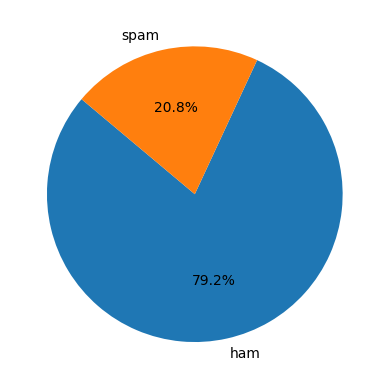

In [17]:
plt.pie(spam_data['Label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=140)

In [18]:
spam_copy=spam_data.copy()

In [19]:
from collections import Counter
count1 = Counter(" ".join(spam_copy[spam_copy['Label']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(spam_copy[spam_copy['Label']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

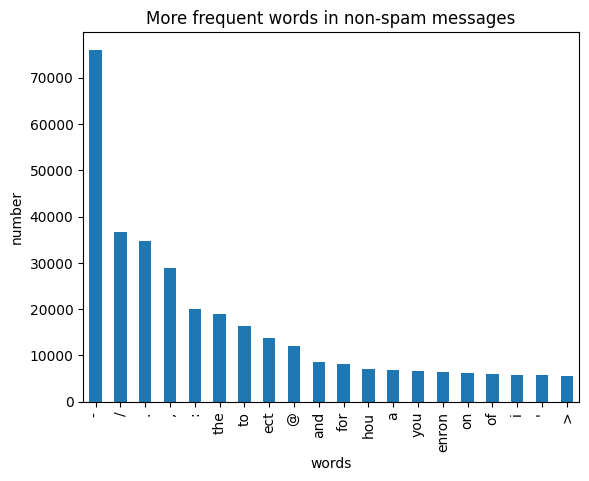

In [20]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

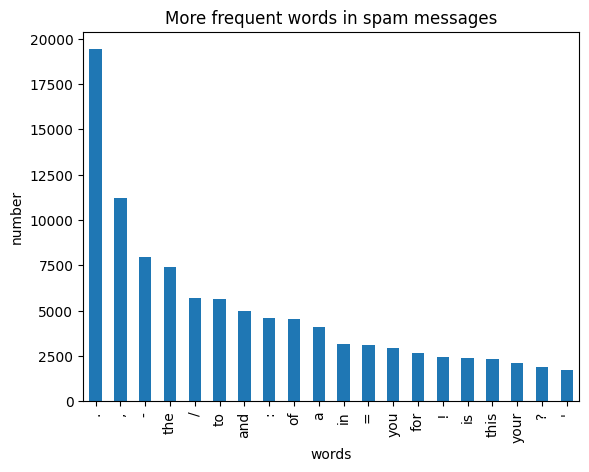

In [21]:
df2.plot.bar(legend = False)
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

def clean_text_spacy(text):
    doc = nlp(text.lower()) 
    tokens = [token.lemma_ for token in doc 
              if token.is_alpha and not token.is_stop]  
    return " ".join(tokens)


In [23]:
spam_copy["Message"] = spam_copy["Message"].apply(clean_text_spacy)

In [24]:
spam_copy

,Label,Message
0,ham,jurong point crazy available bugis n great wor...
1,ham,ok lar joke wif u oni
2,spam,free entry wkly comp win fa cup final tkts tex...
3,ham,u dun early hor u c
4,ham,nah think go usf live
...,...,...
10157,ham,subject fw crosstex energy driscoll ranch mete...
10158,ham,subject ft transport volume decrease contract ...
10159,ham,subject follow nom hpl t extra mmcf d weekend ...
10160,ham,subject industrial worksheet august activity a...


    Model selection and training

In [25]:
y=spam_copy['Label'].map({'ham':0,'spam':1})
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(spam_copy["Message"]).toarray()

In [26]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "LinearSVC": LinearSVC(),
}

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
def evaluate_models(x, y, models):
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    

    models_list = []
    scores = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train, y_train) 

        y_pred = model.predict(x_test)

        score = accuracy_score(y_test,y_pred)
        
        model_name = list(models.keys())[i]
        print(f'---- score for --- {model_name} ----')
        print(f"{score}")
        models_list.append(model_name)
        scores.append(score)
    
    print()
    
    report = pd.DataFrame()
    report['Model_name'] = models_list
    report['Score'] = scores        
    return report

In [28]:
report = evaluate_models(x, y, models)

---- score for --- Multinomial Naive Bayes ----
0.9311362518445647
---- score for --- Gaussian Naive Bayes ----
0.9055582882439744
---- score for --- LinearSVC ----
0.9650762420068864



In [29]:
report.sort_values('Score')

,Model_name,Score
1,Gaussian Naive Bayes,0.905558
0,Multinomial Naive Bayes,0.931136
2,LinearSVC,0.965076


In [30]:
spam_copy['Message'] = spam_copy['Message'].dropna() 

as we can see LinearSVC gives best score accuracy , so we will use LinearSVC

In [31]:
cv = CountVectorizer()
X = cv.fit_transform(spam_copy["Message"])  # Keep it sparse
Y = spam_copy["Label"]

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],       
    'max_iter': [1000, 2000, 3000] 
}

svc_model = LinearSVC()

svc_cv = GridSearchCV(svc_model, params, cv=10, n_jobs=-1)
svc_cv.fit(x_train, y_train)

print("Tuned hyperparameters (best parameters): ", svc_cv.best_params_)
print("Accuracy : ", svc_cv.best_score_)


Tuned hyperparameters (best parameters):  {'C': 0.1, 'max_iter': 1000}
Accuracy :  0.9661702688455455


In [34]:
svc_best = LinearSVC(**svc_cv.best_params_)

# Fit the model on training data
svc_best.fit(x_train, y_train)

# Predict on test data
y_pred = svc_best.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
confusion_m = confusion_matrix(y_test, y_pred)

print(f"Accuracy of the model is {accuracy}")
print(f"The confusion matrix is:\n{confusion_m}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of the model is 0.9699950811608461
The confusion matrix is:
[[1589   26]
 [  35  383]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1615
        spam       0.94      0.92      0.93       418

    accuracy                           0.97      2033
   macro avg       0.96      0.95      0.95      2033
weighted avg       0.97      0.97      0.97      2033



In [35]:
spam_copy

,Label,Message
0,ham,jurong point crazy available bugis n great wor...
1,ham,ok lar joke wif u oni
2,spam,free entry wkly comp win fa cup final tkts tex...
3,ham,u dun early hor u c
4,ham,nah think go usf live
...,...,...
10157,ham,subject fw crosstex energy driscoll ranch mete...
10158,ham,subject ft transport volume decrease contract ...
10159,ham,subject follow nom hpl t extra mmcf d weekend ...
10160,ham,subject industrial worksheet august activity a...


In [36]:
spam_copy.to_csv("spamham.csv", index=False)

In [37]:
import os
import pickle

# Go up one directory level to project root
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

artifacts_dir = os.path.join(root_dir, "artifacts")
os.makedirs(artifacts_dir, exist_ok=True)

with open(os.path.join(artifacts_dir, "best_model.pkl"), "wb") as f:
    pickle.dump(svc_best, f)

In [38]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(cv, f)